# Decision Trees with Titanic Kaggle Dataset

In [1]:
import pandas
data = pandas.read_csv("titanic.csv")
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [2]:
y, X = data['survived'], data[['pclass','sex','age','sibsp', 'fare']].fillna(0)
X['sex'].replace(['female','male'],[0,1],inplace=True)
X['age'] = X['age'].astype(int)
y.head(10), X.head(10)

(0    1
 1    1
 2    0
 3    0
 4    0
 5    1
 6    1
 7    0
 8    1
 9    0
 Name: survived, dtype: int64,    pclass  sex  age  sibsp      fare
 0       1    0   29      0  211.3375
 1       1    1    0      1  151.5500
 2       1    0    2      1  151.5500
 3       1    1   30      1  151.5500
 4       1    0   25      1  151.5500
 5       1    1   48      0   26.5500
 6       1    0   63      1   77.9583
 7       1    1   39      0    0.0000
 8       1    0   53      2   51.4792
 9       1    1   71      0   49.5042)

In [3]:
X.columns

Index([u'pclass', u'sex', u'age', u'sibsp', u'fare'], dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)
len(X_train), len(y_train), len(X_test), len(y_test)

(1047, 1047, 262, 262)

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.80916030534351147

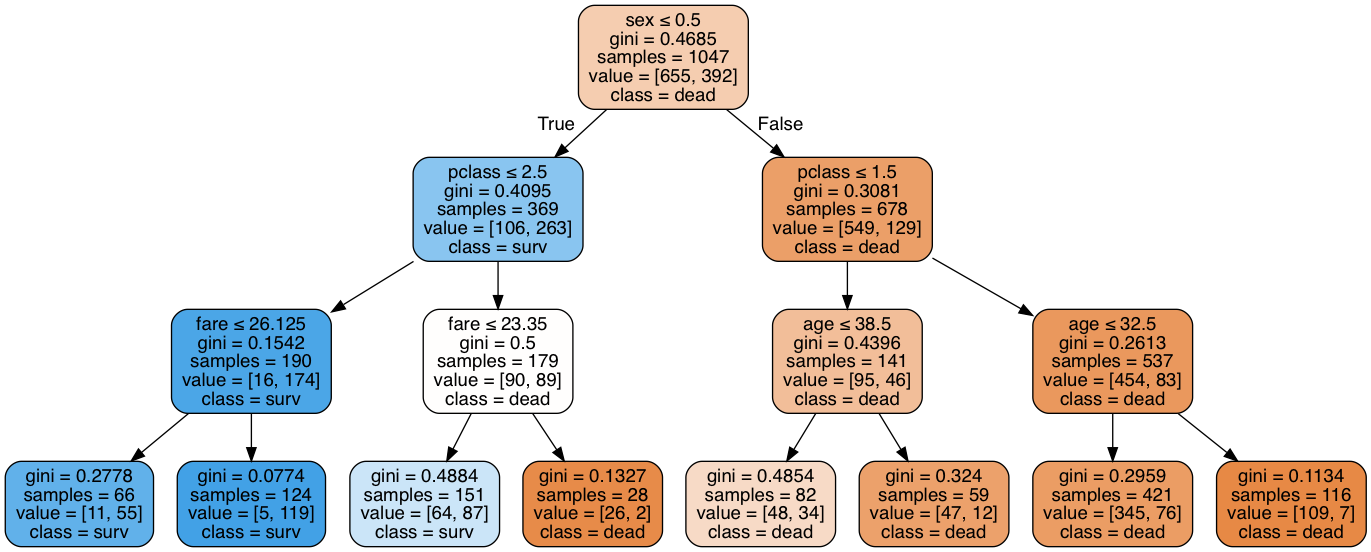

In [6]:
# http://qiita.com/mokemokechicken/items/98564e4a6a8963b2a6e2
import os
from tempfile import mkstemp
import subprocess

from sklearn.tree.export import export_graphviz

def convert_decision_tree_to_ipython_image(clf, feature_names=None, class_names=None,
                                           image_filename=None, tmp_dir=None):
    dot_filename = mkstemp(suffix='.dot', dir=tmp_dir)[1]
    with open(dot_filename, "w") as out_file:
        export_graphviz(clf, out_file=out_file,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)

    from IPython.display import Image
    image_filename = image_filename or ('%s.png' % dot_filename)

    subprocess.call(('dot -Tpng -o %s %s' % (image_filename, dot_filename)).split(' '))
    image = Image(filename=image_filename)
    os.remove(dot_filename)
    return image

convert_decision_tree_to_ipython_image(clf, image_filename='titanic.png', feature_names=X.columns, class_names=["dead", "surv"])

In [7]:
from sklearn import ensemble
clf_rf = ensemble.RandomForestClassifier(n_estimators=50)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

0.81679389312977102